#### **Name- Prashant Pal**
##### (Machine Learning Intern - Mentorness)
##### Batch – MIP-ML-10

---------------------------------------------------------------------------------------------

### Problem Statement: Predictive Modeling for Disease Diagnosis

**Background:**
Healthcare professionals often rely on various diagnostic tests and biomarkers to assess an individual's health status and diagnose diseases. In this scenario, we have access to a dataset containing multiple health-related attributes such as cholesterol levels, blood cell counts, hormone levels, and other physiological measurements. The dataset also includes information on whether the individual has been diagnosed with a specific disease or not.

**Objective:**
The objective of this project is to develop a predictive model that can accurately classify individuals into diseased or non-diseased categories based on their health attributes. By leveraging machine learning algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease diagnosis and prognosis.

**Data Description:**
The dataset consists of the following att- Cholesterol: Level of cholesterol in the blood (mg/dL)
- Hemoglobin: Protein in red blood cells carrying oxygen
- Platelets: Blood cells aiding in clotting
- White Blood Cells (WBC): Immune system cells fighting infections
- Red Blood Cells (RBC): Cells carrying oxygen
- Hematocrit: Percentage of blood volume occupied by RBC
- Mean Corpuscular Volume (MCV): Average volume of RBC
- Mean Corpuscular Hemoglobin (MCH): Average amount of hemoglobin in RBC
- Mean Corpuscular Hemoglobin Concentration (MCHC): Average concentration hemoglobin in 
  RBC
- Insulin: Hormone regulating blood sugar levels
- BMI (Body Mass Index): Measure of body fat based on height and weight
- Systolic Blood Pressure (SBP): Pressure in arteries during heartbeats
- Diastolic Blood Pressure (DBP): Pressure in arteries at rest between beats
- Triglycerides: Type of fat found in blood (mg/dL)
- HbA1c (Glycated Hemoglobin): Measure of average blood sugar levels over past 2-3 months
- LDL (Low-Density Lipoprotein) Cholesterol: "Bad" cholesterol
- HDL (High-Density Lipoprotein) Cholesterol: "Good" cholesterol
- ALT (Alanine Aminotransferase): Liver enzyme
- AST (Aspartate Aminotransferase): Enzyme found in liver and heart
- Heart Rate: Number of heartbeats per minute (bpm)
- Creatinine: Waste product produced by muscles and filtered by kidneys
- Troponin: Protein released into bloodstream during heart muscle damage
- C-reactive Protein (CRP): Marker of inflammation in the body
- Disease: Multiclass indicator

**Task:**
Given this dataset, the task is to build a machine learning model capable of predicting the likelihood of an individual having a specific disease based on their health attributes. The model's performance will be evaluated using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

**Outcome:**
The ultimate goal is to develop a robust predictive model that can assist healthcare professionals in early disease detection and patient management. By accurately identifying individuals at risk of certain diseases, interventions can be initiated promptly, potentially improving patient outcomes and reducing healthcare costs.utcomes and reducing healthcare costs.

---------------------------------------------------------------------------------------------

### Importing important Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder

# Logistic regression
from sklearn.linear_model import LogisticRegression

# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree,export_text

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Naive bayes
from sklearn.naive_bayes import GaussianNB

# SVM
from sklearn.svm import SVC

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score,\
recall_score,f1_score

### Load the training and test datasets

In [52]:
train=pd.read_csv('Train_data.csv')
test=pd.read_csv('test_data.csv')

In [53]:
A=train
B=test

### Preprocessing Data

In [54]:
A.columns=A.columns.str.lower()
B.columns=B.columns.str.lower()

In [55]:
A.head(5)

,glucose,cholesterol,hemoglobin,platelets,white blood cells,red blood cells,hematocrit,mean corpuscular volume,mean corpuscular hemoglobin,mean corpuscular hemoglobin concentration,...,hba1c,ldl cholesterol,hdl cholesterol,alt,ast,heart rate,creatinine,troponin,c-reactive protein,disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [56]:
B.head(5)

,glucose,cholesterol,hemoglobin,platelets,white blood cells,red blood cells,hematocrit,mean corpuscular volume,mean corpuscular hemoglobin,mean corpuscular hemoglobin concentration,...,hba1c,ldl cholesterol,hdl cholesterol,alt,ast,heart rate,creatinine,troponin,c-reactive protein,disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [57]:
print("----------------------------------------Data Type of A's Features----------------------------------------")
print(A.info())
print("----------------------------------------Data Type of B's Features----------------------------------------")
B.info()

----------------------------------------Data Type of A's Features----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   glucose                                    2351 non-null   float64
 1   cholesterol                                2351 non-null   float64
 2   hemoglobin                                 2351 non-null   float64
 3   platelets                                  2351 non-null   float64
 4   white blood cells                          2351 non-null   float64
 5   red blood cells                            2351 non-null   float64
 6   hematocrit                                 2351 non-null   float64
 7   mean corpuscular volume                    2351 non-null   float64
 8   mean corpuscular hemoglobin                2351 non-null   flo

### Finding Missing Values

In [58]:
print("----------------------------------------Null Values of A----------------------------------------")
print(A.isnull().sum())
print("----------------------------------------Null Values of B----------------------------------------")
B.isnull().sum()

----------------------------------------Null Values of A----------------------------------------
glucose                                      0
cholesterol                                  0
hemoglobin                                   0
platelets                                    0
white blood cells                            0
red blood cells                              0
hematocrit                                   0
mean corpuscular volume                      0
mean corpuscular hemoglobin                  0
mean corpuscular hemoglobin concentration    0
insulin                                      0
bmi                                          0
systolic blood pressure                      0
diastolic blood pressure                     0
triglycerides                                0
hba1c                                        0
ldl cholesterol                              0
hdl cholesterol                              0
alt                                          0
ast       

glucose                                      0
cholesterol                                  0
hemoglobin                                   0
platelets                                    0
white blood cells                            0
red blood cells                              0
hematocrit                                   0
mean corpuscular volume                      0
mean corpuscular hemoglobin                  0
mean corpuscular hemoglobin concentration    0
insulin                                      0
bmi                                          0
systolic blood pressure                      0
diastolic blood pressure                     0
triglycerides                                0
hba1c                                        0
ldl cholesterol                              0
hdl cholesterol                              0
alt                                          0
ast                                          0
heart rate                                   0
creatinine   

In [59]:
print(A['disease'].value_counts())
B['disease'].value_counts()

disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64


disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64

#### Encoding for both training and test datasets for the target variable

In [60]:
# Additional category in the test data
train_categories = ['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc']
additional_category = 'Heart Di'

# Add the additional category to the training categories
train_categories.append(additional_category)

# Initialize OrdinalEncoder with the training categories
ordinal_encoder = OrdinalEncoder(categories=[train_categories])

# Fit and transform the 'disease' column in both training and test datasets
A['disease'] = ordinal_encoder.fit_transform(A[['disease']])
B['disease'] = ordinal_encoder.transform(B[['disease']])



In [61]:
print(A['disease'].value_counts())
B['disease'].value_counts()

disease
3.0    623
0.0    556
1.0    540
2.0    509
4.0    123
Name: count, dtype: int64


disease
1.0    294
3.0     84
2.0     48
5.0     39
4.0     16
0.0      5
Name: count, dtype: int64

In [62]:
B['disease'].unique()

array([2., 1., 5., 3., 4., 0.])

In [63]:
# Display the first few rows of the DataFrame to verify the changes
A.head(10)

,glucose,cholesterol,hemoglobin,platelets,white blood cells,red blood cells,hematocrit,mean corpuscular volume,mean corpuscular hemoglobin,mean corpuscular hemoglobin concentration,...,hba1c,ldl cholesterol,hdl cholesterol,alt,ast,heart rate,creatinine,troponin,c-reactive protein,disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,0.0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1.0
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,2.0
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,3.0
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,2.0
5,0.898222,0.258706,0.933307,0.353082,0.373952,0.297138,0.900010,0.985488,0.679007,0.355774,...,0.389461,0.529914,0.222687,0.772461,0.119994,0.894273,0.128124,0.379016,0.751438,1.0
6,0.353734,0.757757,0.755007,0.012594,0.227684,0.425117,0.387461,0.461418,0.305588,0.741120,...,0.446854,0.729376,0.615543,0.794735,0.233890,0.612188,0.407891,0.426863,0.532100,4.0
7,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,4.0
8,0.722428,0.300282,0.487907,0.200865,0.402035,0.729285,0.851338,0.820546,0.106637,0.006947,...,0.022621,0.061317,0.644191,0.715823,0.417170,0.639148,0.213026,0.549920,0.036800,2.0
9,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,4.0


### Exploratory Data Analysis

#### Display basic statistics

In [64]:
A.describe()

,glucose,cholesterol,hemoglobin,platelets,white blood cells,red blood cells,hematocrit,mean corpuscular volume,mean corpuscular hemoglobin,mean corpuscular hemoglobin concentration,...,hba1c,ldl cholesterol,hdl cholesterol,alt,ast,heart rate,creatinine,troponin,c-reactive protein,disease
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308,1.666950
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034,1.240834
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867,0.000000
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192,1.000000
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601,2.000000
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426,3.000000
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906,4.000000


#### Mapping disease_name temporary for Visualization

In [65]:
# Create a dictionary to map encoded categories to their names
encoded_to_names = {
    0: 'Healthy',
    1: 'Diabetes',
    2: 'Thalasse',
    3: 'Anemia',
    4: 'Thromboc',
    9: 'Heart Di'
}

# Map the encoded categories to their names in the 'disease' column
A['disease_name'] = A['disease'].map(encoded_to_names)

#### Count plot of the Target variable

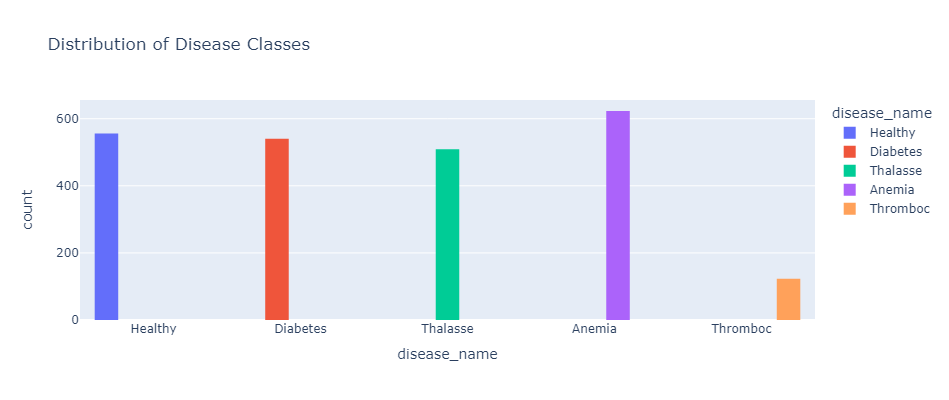

In [66]:
# Create the histogram with disease names on the x-axis
fig = px.histogram(A, x='disease_name', title='Distribution of Disease Classes', color='disease_name', barmode='group',
                   category_orders={'disease_name': ['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc', 'Heart Di']})
fig.update_layout(width=800, height=400)
fig.show()

In [67]:
# Remove the temporary 'disease_name' column from the DataFrame
A.drop('disease_name', axis=1, inplace=True)

In [68]:
print(A['disease'].value_counts())
B['disease'].value_counts()

disease
3.0    623
0.0    556
1.0    540
2.0    509
4.0    123
Name: count, dtype: int64


disease
1.0    294
3.0     84
2.0     48
5.0     39
4.0     16
0.0      5
Name: count, dtype: int64

#### Correlation 

In [69]:
corre=A[['glucose', 'cholesterol', 'hemoglobin', 'platelets',
       'white blood cells', 'red blood cells', 'hematocrit',
       'mean corpuscular volume', 'mean corpuscular hemoglobin',
       'mean corpuscular hemoglobin concentration', 'insulin', 'bmi',
       'systolic blood pressure', 'diastolic blood pressure', 'triglycerides',
       'hba1c', 'ldl cholesterol', 'hdl cholesterol', 'alt', 'ast',
       'heart rate', 'creatinine', 'troponin', 'c-reactive protein','disease']].corr()

#### Sorting Correlation between Disease and Other features

In [70]:
# Extract correlations with the 'disease' column
correlation_with_disease = corre['disease'].drop('disease')

# Sort the correlations by absolute value in descending order
sorted_correlation_with_disease = correlation_with_disease.abs().sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlation_with_disease)

white blood cells                            0.275133
heart rate                                   0.269859
glucose                                      0.268914
hematocrit                                   0.240140
ldl cholesterol                              0.205335
bmi                                          0.191203
red blood cells                              0.172792
mean corpuscular volume                      0.161337
mean corpuscular hemoglobin                  0.159698
insulin                                      0.157774
c-reactive protein                           0.151063
platelets                                    0.150405
hdl cholesterol                              0.125333
hba1c                                        0.104023
triglycerides                                0.092154
troponin                                     0.079449
systolic blood pressure                      0.048584
diastolic blood pressure                     0.045148
hemoglobin                  

#### Correlation Heatmap

<Axes: >

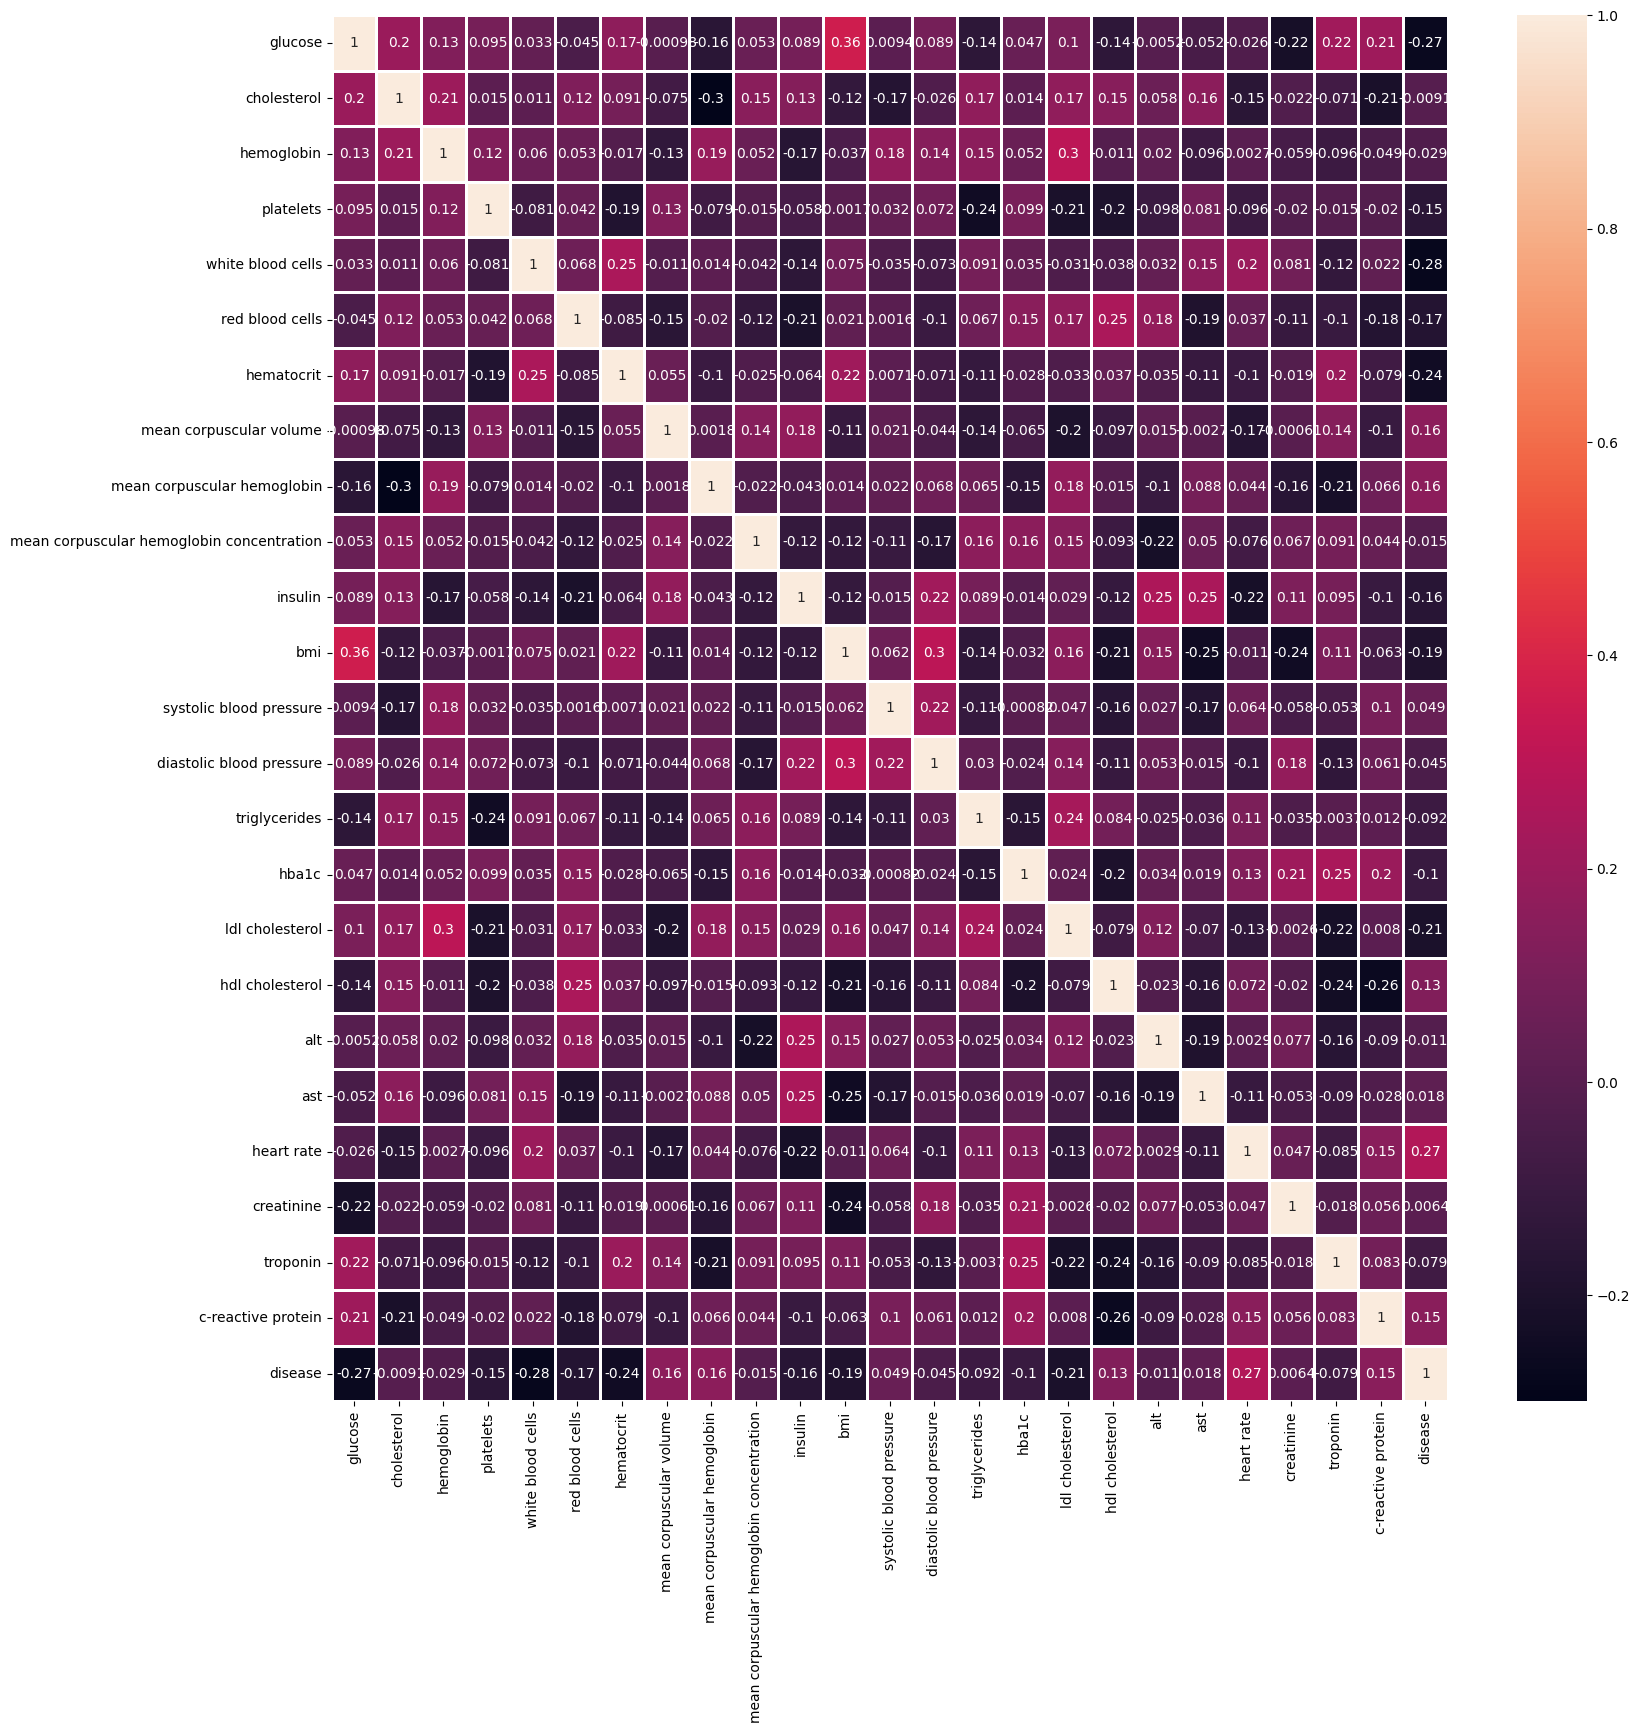

In [71]:
fig,ax = plt.subplots(figsize=(18,18))
sns.heatmap(corre,annot=True,linewidths=1,ax=ax)

#### Pairplot for highest correlated features with Disease

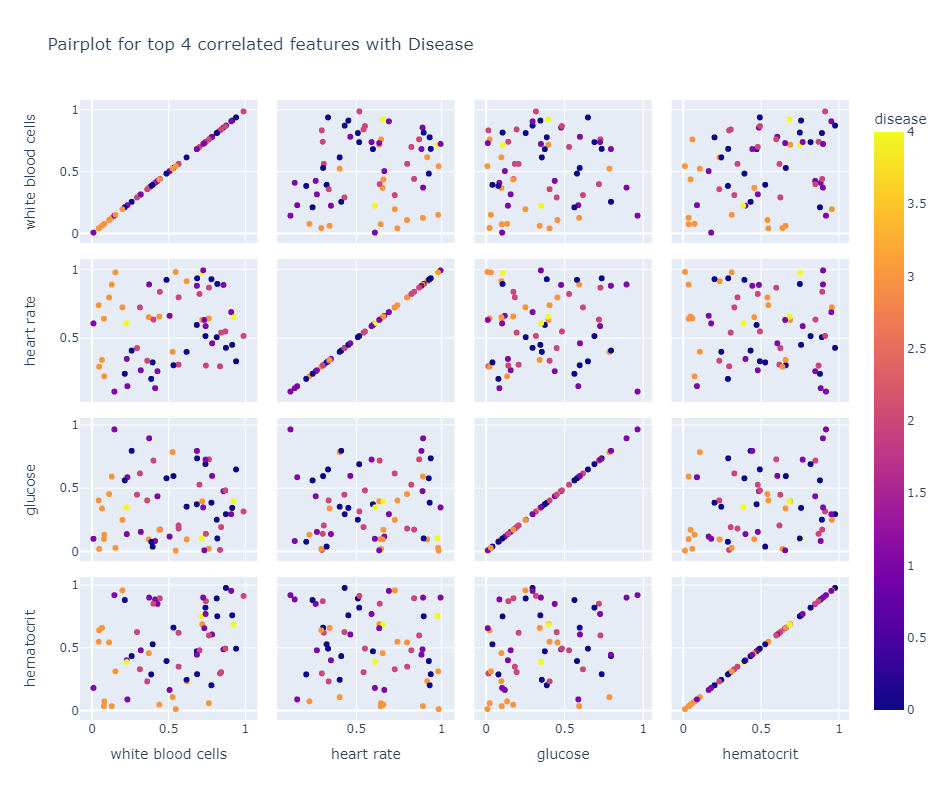

In [88]:
fig = px.scatter_matrix(A, dimensions=['white blood cells', 'heart rate', 'glucose', 'hematocrit'], \
                        color='disease', title='Pairplot for top 4 correlated features with Disease')
fig.update_layout(width=1000, height=800)
fig.show()

### Splitting X and Y

In [73]:
X_train=A.drop('disease',axis=1)
Y_train=A['disease']
X_test=B.drop('disease',axis=1)
Y_test=B['disease']

In [74]:
print('X_train:',X_train.shape)
print('Y_train:',Y_train.shape)
print('X_test:',X_test.shape)
print('Y_test:',Y_test.shape)

X_train: (2351, 24)
Y_train: (2351,)
X_test: (486, 24)
Y_test: (486,)


### Evaluation and Prediction using different models

In [75]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(max_depth=2, random_state=100),
    "Naive Baye": GaussianNB(),
    "SVM": SVC()
}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_test_pred = model.predict(X_test)
    
    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred)
    model_test_F1 = f1_score(Y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(Y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(Y_test, y_test_pred, average='weighted')

    print(model_name)
    print("-----------------------------------")
    print("Model performance of Testing set")
    print('- Accuracy:{:.4f}'.format(model_test_accuracy))
    print('- F1 Score:{:.4f}'.format(model_test_F1))
    print('- Precision:{:.4f}'.format(model_test_precision))
    print('- Recall:{:.4f}'.format(model_test_recall))

    print("="*35)
    print('\n')

Logistic Regression
-----------------------------------
Model performance of Testing set
- Accuracy:0.3477
- F1 Score:0.3899
- Precision:0.4854
- Recall:0.3477


Decision Tree
-----------------------------------
Model performance of Testing set
- Accuracy:0.3971
- F1 Score:0.4208
- Precision:0.4933
- Recall:0.3971


Random Forest
-----------------------------------
Model performance of Testing set
- Accuracy:0.4362
- F1 Score:0.4503
- Precision:0.4928
- Recall:0.4362


Naive Baye
-----------------------------------
Model performance of Testing set
- Accuracy:0.5370
- F1 Score:0.5233
- Precision:0.5221
- Recall:0.5370


SVM
-----------------------------------
Model performance of Testing set
- Accuracy:0.4691
- F1 Score:0.4861
- Precision:0.5127
- Recall:0.4691




### Hyperparameter Tuning for Random Forest Classifier

In [42]:
rf_params = {
    'n_estimators': [100, 200, 500, 1000, 1500],  # Add more estimators for larger range
    'max_depth': [5, 8, 10, 15, 20, None],         # Include more depth values
    'min_samples_split': [2, 5, 10, 15, 20],       # Refine split values
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None] # Try different feature options
}
rf_params

{'n_estimators': [100, 200, 500, 1000, 1500],
 'max_depth': [5, 8, 10, 15, 20, None],
 'min_samples_split': [2, 5, 10, 15, 20],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2', None]}

In [43]:
randomcv_models = [("RF", RandomForestClassifier(), rf_params)]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 500, 1000, 1500],
   'max_depth': [5, 8, 10, 15, 20, None],
   'min_samples_split': [2, 5, 10, 15, 20],
   'min_samples_leaf': [1, 2, 4],
   'max_features': ['auto', 'sqrt', 'log2', None]})]

### Finding Best Parameters

In [81]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name, model, params in randomcv_models:
    random_search = RandomizedSearchCV(estimator=model,
                                       param_distributions=params,
                                       n_iter=100,
                                       cv=3,
                                       verbose=2,
                                       n_jobs=-1)
    random_search.fit(X_train, Y_train)
    model_param[name] = random_search.best_params_

# Print the best parameters for each model
for model_name in model_param:
    print(f"--------------- Best Params for {model_name} -------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------- Best Params for RF -------------
{'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}


### Evaluate the Hypertuned Parameter and Predict again

In [86]:
models={
    "Random Forest": RandomForestClassifier(max_depth=2, random_state=100),
    "Random Forest Hypertuned":RandomForestClassifier(n_estimators=1500, min_samples_split=20, \
                                           min_samples_leaf=4, max_features='log2', max_depth=8)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)

# Making Predictions
    y_test_pred=model.predict(X_test)

# Test set performance 
    model_test_accuracy = accuracy_score(Y_test, y_test_pred)
    model_test_F1 = f1_score(Y_test, y_test_pred, average='weighted')  # specify average parameter
    model_test_precision = precision_score(Y_test, y_test_pred, average='weighted')  # specify average parameter
    model_test_recall = recall_score(Y_test, y_test_pred, average='weighted')  # specify average parameter

    print(list(models.keys())[i])

    print("-----------------------------------")
    
    print("Model performance of Testing set")
    print('-Accuracy:{:.4f}'.format(model_test_accuracy))
    print('-F1 Score:{:.4f}'.format(model_test_F1))
    print('-Precision:{:.4f}'.format(model_test_precision))
    print('-Recall:{:.4f}'.format(model_test_recall))

    
    print("="*35)
    print('\n')

Random Forest
-----------------------------------
Model performance of Testing set
-Accuracy:0.4362
-F1 Score:0.4503
-Precision:0.4928
-Recall:0.4362


Random Forest Hypertuned
-----------------------------------
Model performance of Testing set
-Accuracy:0.4650
-F1 Score:0.4752
-Precision:0.5293
-Recall:0.4650




### Training Naive Bayes Model for saving

In [79]:
gb=GaussianNB()
gb.fit(X_train,Y_train)
y_gb_predict = gb.predict(X_test)

### Save the Naive Bayes Model

In [80]:
import pickle

# Save the model
pickle.dump(gb, open('Disease_Prediction.pkl', 'wb'))

# Load the model from the file
Naive_bayes_model = pickle.load(open('Disease_Prediction.pkl', 'rb'))

# Use the loaded model to make predictions
predictions = Naive_bayes_model.predict(X_test)


### Best Model Selection

**Naive Bayes** emerges as the best model overall based on the performance metrics. It has the highest accuracy (0.5370) and \
recall (0.5370), making it a strong candidate for predicting the likelihood of a disease. High recall is crucial in healthcare \
for minimizing false negatives, ensuring that individuals with the disease are correctly identified. Missing a true case of a \
disease (false negative) can have severe consequences, including delayed treatment and worsening of the patient’s condition. \
\
**Secondary Considerations**
SVM and Hypertuned Random Forest show competitive performance with relatively high precision \
(0.5128 and 0.5293, respectively).High precision is valuable in minimizing false positives, which is important for ensuring \
that healthy individuals are not incorrectly diagnosed. False positives can lead to unnecessary stress and additional \
testing, but they are generally less harmful than false negatives.

=====================================================================================